#环境介绍
本示例运行在windows

#本示例概要

本示例主要是带领大家如何在本地端建置属于自己的LLM，并透过互动式Web来进行互动式问答，且将模型输出文字透过google的gTTS软体，将模型输出文字透过gTTS所支持的60几种国家的语言说出来。

在实作本范例时，最好延续first_local_llm.ipynb步骤后操作。

#安装说明

1️⃣ 用管理者的身份开启Anaconda Prompt 安装ollama套件，执行安装gtts

> pip install gtts
或 conda install -c conda-forge gtts

2️⃣ 范例代码
1.   首先我们先把页面的代码进行撰写，并透过streamlit来查看页面











In [ ]:
import streamlit as st
import ollama

from gtts.lang import tts_langs #調用gtts語言
from gtts import gTTS #主要使用的套件
import base64 #將音訊轉為64編碼
from tempfile import NamedTemporaryFile #用來保存我們的音檔

langs = tts_langs().keys() #載入所有語言的清單

def autiplay_audio(file_path: str): #自動播放音訊
    with open(file_path, "rb") as f:
        data =f.read()
        b64 = base64.b64encode(data).decode()
        md = f"""
            <audio controls autoplay ="true">
            <source src="data:audio/mp3;base64,{b64}" type="audio/mp3">
            Your browser dose not support the audio element.
            </audio>

        """
        st.markdown(
            md,
            unsafe_allow_html=True,
            )

def main():
    st.title("我第一個對話機器人會說話")
    #選擇要發音的語言
    lang = st.selectbox("請選擇發音的語言", options=langs, index=57) #預設選擇繁體中文（zh-TW）
    #設置用戶輸入框
    user_input = st.text_area("您想問什麼？","")
    #當使用者按下送出按鈕後的處理
    if st.button("送出"):
        if user_input:
            #使用ollama模型，進行對話
            response = ollama.chat(model='mistral',messages=[{'role': 'user', 'content': user_input}])

            #顯示回答
            st.text("回答：")
            st.write(response['message']['content'])

            tts=gTTS(response['message']['content'],lang=lang,slow=False,lang_check=True)
            with NamedTemporaryFile(suffix=".mp3",delete=False) as temp:
                tempname =temp.name
                tts.save(tempname)
                autiplay_audio(tempname)
        else:
            st.warning("請輸入問題！")

if __name__ == "__main__":
    main()




2.   打开Anaconda Prompt切换到上面python的脚本位置，执行cd python的脚本位置指令。

> cd C:\Users\joyce

3.   再来继续在Anaconda Prompt执行python -m streamlit run 您的程序名称。这里要注意streamlit版本，执行语法可能会有差异。你的第一个本地端自然语言对话程式就完成。

> python -m streamlit run first_llm_talk_robot.py

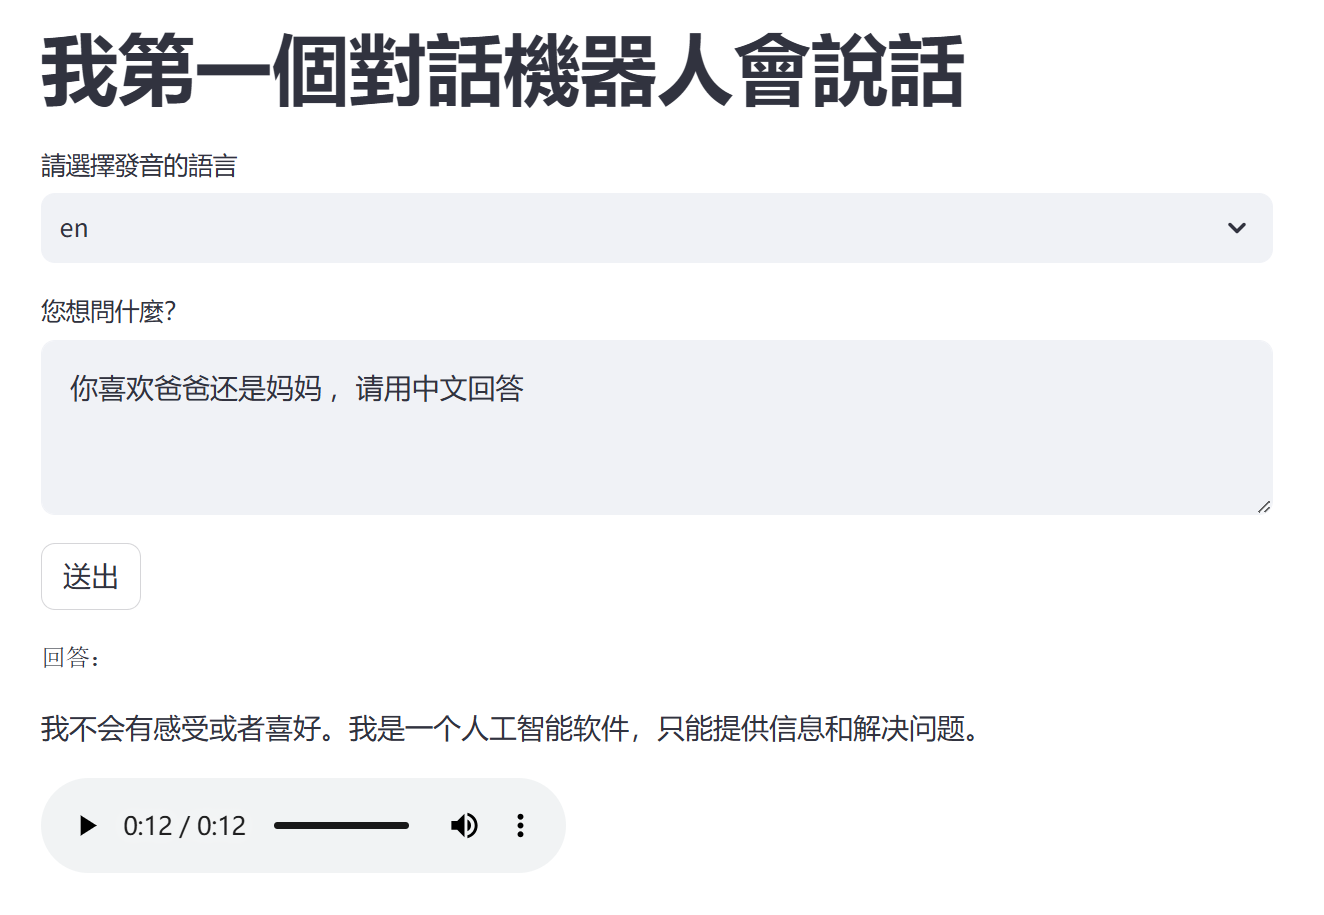